# Movies dataset
# OSEMN methodology, Step 3:
# Explore cleaned data obtained from IMDb
For description of EDA methodology, refer to $\texttt{methodology/3.explore/}$

For previous steps, refer to $\texttt{notebooks/1.obtain}$ and $\texttt{notebooks/2.scrub}$.

Datasets that are being explored here have been produced from PostgreSQL database that was created from the .tsv files downloaded from IMDb in Step 1: Obtain.

EDA datasets have been produced via SQL queries, for details refer to $\texttt{sql/queries/eda}$ and $\texttt{sql/queries/eda_join}$.

## Import dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
import os

sns.set()

In [2]:
data_dir = '../../data/imdb/'
tsv_dir = data_dir + 'unpacked/'
os.listdir(tsv_dir)

['title.basics.tsv',
 'title.ratings.tsv',
 'name.basics.tsv',
 'title.crew.tsv',
 'title.principals.tsv',
 'title.akas.tsv',
 'title.episode.tsv']

In [3]:
ri_dir = data_dir + 'ref_integrity/'
os.listdir(ri_dir)

['title.akas_ri.csv',
 'title.ratings_ri.csv',
 'title.episode_ri.csv',
 'title.principals_ri.csv',
 'title.crew_ri.csv',
 'movies_public_title.basics.csv',
 'movies_public_name.basics.csv']

In [4]:
eda_dir = '../../sql/results/EDA/'
os.listdir(eda_dir)

['title.principles_count_by_job.csv',
 'title.principals_count_by_tconst.csv',
 'title.basics_200_count_by_originaltitle.csv',
 'title.basics_runtime_by_startyear.csv',
 'title.principals_unq_nconst_counts_by_category.csv',
 'title.basics_count_by_originaltitle.csv',
 'title.basics_count_by_genre_ts.csv',
 'title.crew_count_by_directors.csv',
 'title.principals_unq_nconst_count_by_job.csv',
 'title.episode_erratic_season.csv',
 'title.principals_count_by_nconst.csv',
 'name.basics_num_professionals.csv',
 'title.basics_primarytitle_Home.csv',
 'title.basics_count_by_startyear.csv',
 'title.episode_count_by_parenttconst.csv',
 'title.basics_primarytitle_Alone.csv',
 'title.basics_count_by_primarytitle.csv',
 'title.episode_count_by_season.csv',
 'title.basics_primarytitle_Broken.csv',
 'title.basics_future_Avatars.csv',
 'title.akas_count_by_language.csv',
 'title.akas_count_by_region.csv',
 'title.akas_100_most_akas.csv',
 'title.basics_count_by_titletype.csv',
 'title.basics_200_count

In [7]:
eda_join_dir = '../../sql/results/EDA_JOIN/'
os.listdir(eda_join_dir)

['johnny_depp_movies.csv',
 'top_rated_movies_by_year.csv',
 'comedies_8.5_rating_100_votes.csv',
 'top_rated_comedies_by_year.csv']

## The rise and fall of Johnny Depp
All movies featuring Johnny Depp

In [63]:
t = time()
file_name = 'johnny_depp_movies.csv'
df = pd.read_csv(eda_join_dir + file_name, delimiter=',',
                 na_values='\\N')
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

----- DataFrame loaded
in 0.04 seconds
with 61 rows
and 8 columns
-- Column names:
 Index(['name', 'startyear', 'title', 'titletype', 'averagerating', 'numvotes',
       'job', 'character'],
      dtype='object')


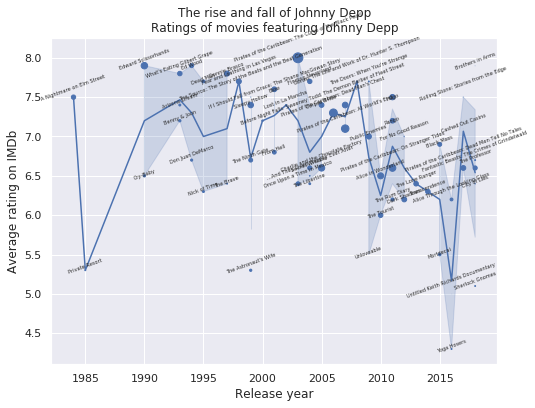

In [75]:
f, ax = plt.subplots(1, figsize=(8, 6))

sns.lineplot(data=df, x='startyear', y='averagerating', ax=ax)
# sns.relplot(data=df, x='startyear', y='averagerating', size='numvotes')
plt.scatter(x=df['startyear'], y=df['averagerating'], s=df['numvotes'] / 10000)
ax.set_title("The rise and fall of Johnny Depp"
             "\nRatings of movies featuring Johnny Depp")
ax.set_ylabel("Average rating on IMDb")
ax.set_xlabel("Release year")

for idx, movie in df.iterrows():
    ax.text(movie['startyear'], movie['averagerating'] - 0.05, movie['title'],
            ha='center', rotation=20, fontsize=5)

plt.savefig('../3.explore/johnny_depp_movies.png', dpi=400)
plt.show()

## All movies directed by Guillermo del Toro

In [61]:
t = time()
file_name = 'del_toro_movies_director.csv'
df = pd.read_csv(eda_join_dir + file_name, delimiter=',',
                 na_values='\\N')
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

----- DataFrame loaded
in 0.02 seconds
with 10 rows
and 8 columns
-- Column names:
 Index(['name', 'startyear', 'title', 'titletype', 'averagerating', 'numvotes',
       'job', 'character'],
      dtype='object')


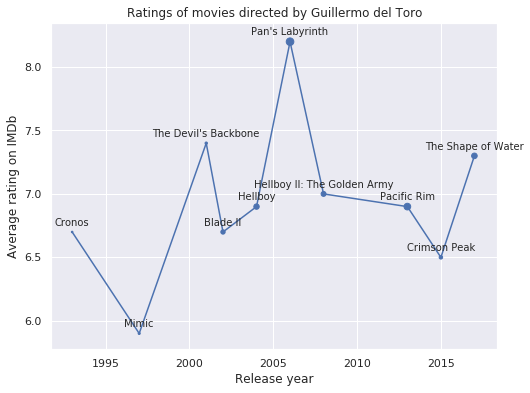

In [62]:
f, ax = plt.subplots(1, figsize=(8, 6))

sns.lineplot(data=df, x='startyear', y='averagerating', ax=ax)
# sns.relplot(data=df, x='startyear', y='averagerating', size='numvotes')
plt.scatter(x=df['startyear'], y=df['averagerating'], s=df['numvotes'] / 10000)
ax.set_title("Ratings of movies directed by Guillermo del Toro")
ax.set_ylabel("Average rating on IMDb")
ax.set_xlabel("Release year")
for idx, movie in df.iterrows():
    ax.text(movie['startyear'], movie['averagerating'] + 0.05, movie['title'],
            ha='center')

plt.savefig('../3.explore/del_toro_movies_all.png', dpi=400)
# plt.show()

In [17]:
os.listdir('../3.explore/johnny_depp.png')

FileNotFoundError: [Errno 2] No such file or directory: '../3.explore/johnny_depp.png'

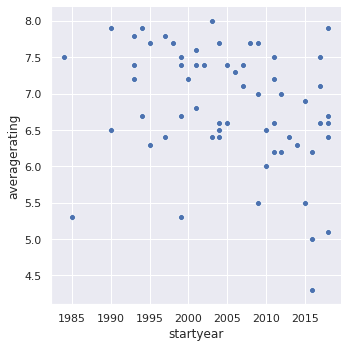

In [17]:
sns.relplot(data=df, x='startyear', y='averagerating')